In [1]:
import matplotlib.pyplot as plt
import nil
import pandas as pd
import seaborn as sns

from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


def forest_test(df):
    X = df.iloc[:, :-1]
    Y = df.iloc[:, -1]
    X = X.fillna(0)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=51)
    trained_forest = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)
    prediction_forest = trained_forest.predict(x_test)
    print(confusion_matrix(y_test, prediction_forest))
    print(classification_report(y_test, prediction_forest))
    return prediction_forest


def read_data_from_directory(wafer_class, machine_step):
    # Create an empty Dataframe to store all data
    df = pd.DataFrame()
    dir_content = listdir("../Wafer_Data/" + wafer_class + "/" + machine_step + "/")
    dir_content.sort()
    cnt = 0
    for file in dir_content:
        filepath = "../Wafer_Data/" + wafer_class + "/" + machine_step + "/" + file
        #         print("Reading File {0}".format(file))
        df = df.append(pd.read_csv(filepath))

    df = df.groupby(['WaferID', "STEP ID"]).describe(percentiles=[])
    wafer_class_bool = nil
    if 'good' in wafer_class:
        df.insert(loc=len(df.columns), column="CLASS", value='Good')
    elif 'bad' in wafer_class:
        df.insert(loc=len(df.columns), column="CLASS", value='Bad')
    return df


def remove_columns(df):
    # Removing "COUNT" Column
    col_index = len(df.columns) - 1 - 6
    while col_index >= 0:
        #         print('Removing Column Number: ', col_index)
        df.drop(df.columns[col_index], axis=1, inplace=True)
        col_index = col_index - 6

    # Removing 50% Columns
    col_index = len(df.columns) - 1 - 2
    while col_index >= 0:
        #         print('Removing Columns Number: ', col_index)
        df.drop(df.columns[col_index], axis=1, inplace=True)
        # print(df.columns[col_index])
        col_index = col_index - 5

    return df


def find_threshold(results, threshold):
    result_list = []
    current = results[0]
    count = 0
    for value in results:
        if value == current:
            count += 1
        else:
            result_list.append((current, count))
            current = value
            count = 1
    result_list.append((current, count))

    consecutive_found = False
    for key, val in result_list:
        if key == 'Bad' and val > threshold:
            consecutive_found = True
            if val > count:
                count = val
    #             break
    if consecutive_found:
        print("There are about", count,
              "bad wafers all consecutively bad!\n\tPreventative Maintenance is suggested to prevent further losses.")
    else:
        print("The threshold of ", threshold, " consecutively bad wafers were not found.")
    return result_list


def print_heatmap(corr_matrix):
    plt.figure(figsize=(30, 30))
    sns.heatmap(round(corr_matrix, 2), annot=True)
    plt.show()


def run_z1(threshold):
    # reading all Z1 Data
    good_z1_df = read_data_from_directory("good_wafer", "Z1_100")
    bad_z1_df = read_data_from_directory("bad_wafer", "Z1_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z1_df.append(bad_z1_df), columns=good_z1_df.columns)

    # Remove Unnecessary Columns
    df = remove_columns(df)

    # Configuring the Heatmap to make it easier to see
    print_heatmap(df.corr())

    # Dividing into Inputs and Outputs and run Random Forest Classification
    result = forest_test(df)
    result_list = find_threshold(result, threshold)
    df = pd.DataFrame(result_list, columns=['Type', 'Count'])
    print(df.groupby('Type').max())


def run_z2(threshold):
    # reading all Z1 Data
    good_z2_df = read_data_from_directory("good_wafer", "Z2_100")
    bad_z2_df = read_data_from_directory("bad_wafer", "Z2_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z2_df.append(bad_z2_df), columns=good_z2_df.columns)

    # Remove Unnecessary Columns
    df = remove_columns(df)

    # Configuring the Heatmap to make it easier to see
    print_heatmap(df.corr())

    # Dividing into Inputs and Outputs and run Random Forest Classification
    result = forest_test(df)
    result_list = find_threshold(result, threshold)
    df = pd.DataFrame(result_list, columns=['Type', 'Count'])
    print(df.groupby('Type').max())


def run_z3(threshold):
    # reading all Z1 Data
    good_z3_df = read_data_from_directory("good_wafer", "Z3_100")
    bad_z3_df = read_data_from_directory("bad_wafer", "Z3_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z3_df.append(bad_z3_df), columns=good_z3_df.columns)

    # Remove Unnecessary Columns
    df = remove_columns(df)

    # Configuring the Heatmap to make it easier to see
    print_heatmap(df.corr())

    # Dividing into Inputs and Outputs and run Random Forest Classification
    result = forest_test(df)
    result_list = find_threshold(result, threshold)
    df = pd.DataFrame(result_list, columns=['Type', 'Count'])
    print(df.groupby('Type').max())


if __name__ == "__main__":
    threshold = int(input("Enter the threshold: "))
    run_z1(threshold)
    run_z2(threshold)
    run_z3(threshold)

Enter the threshold:  10


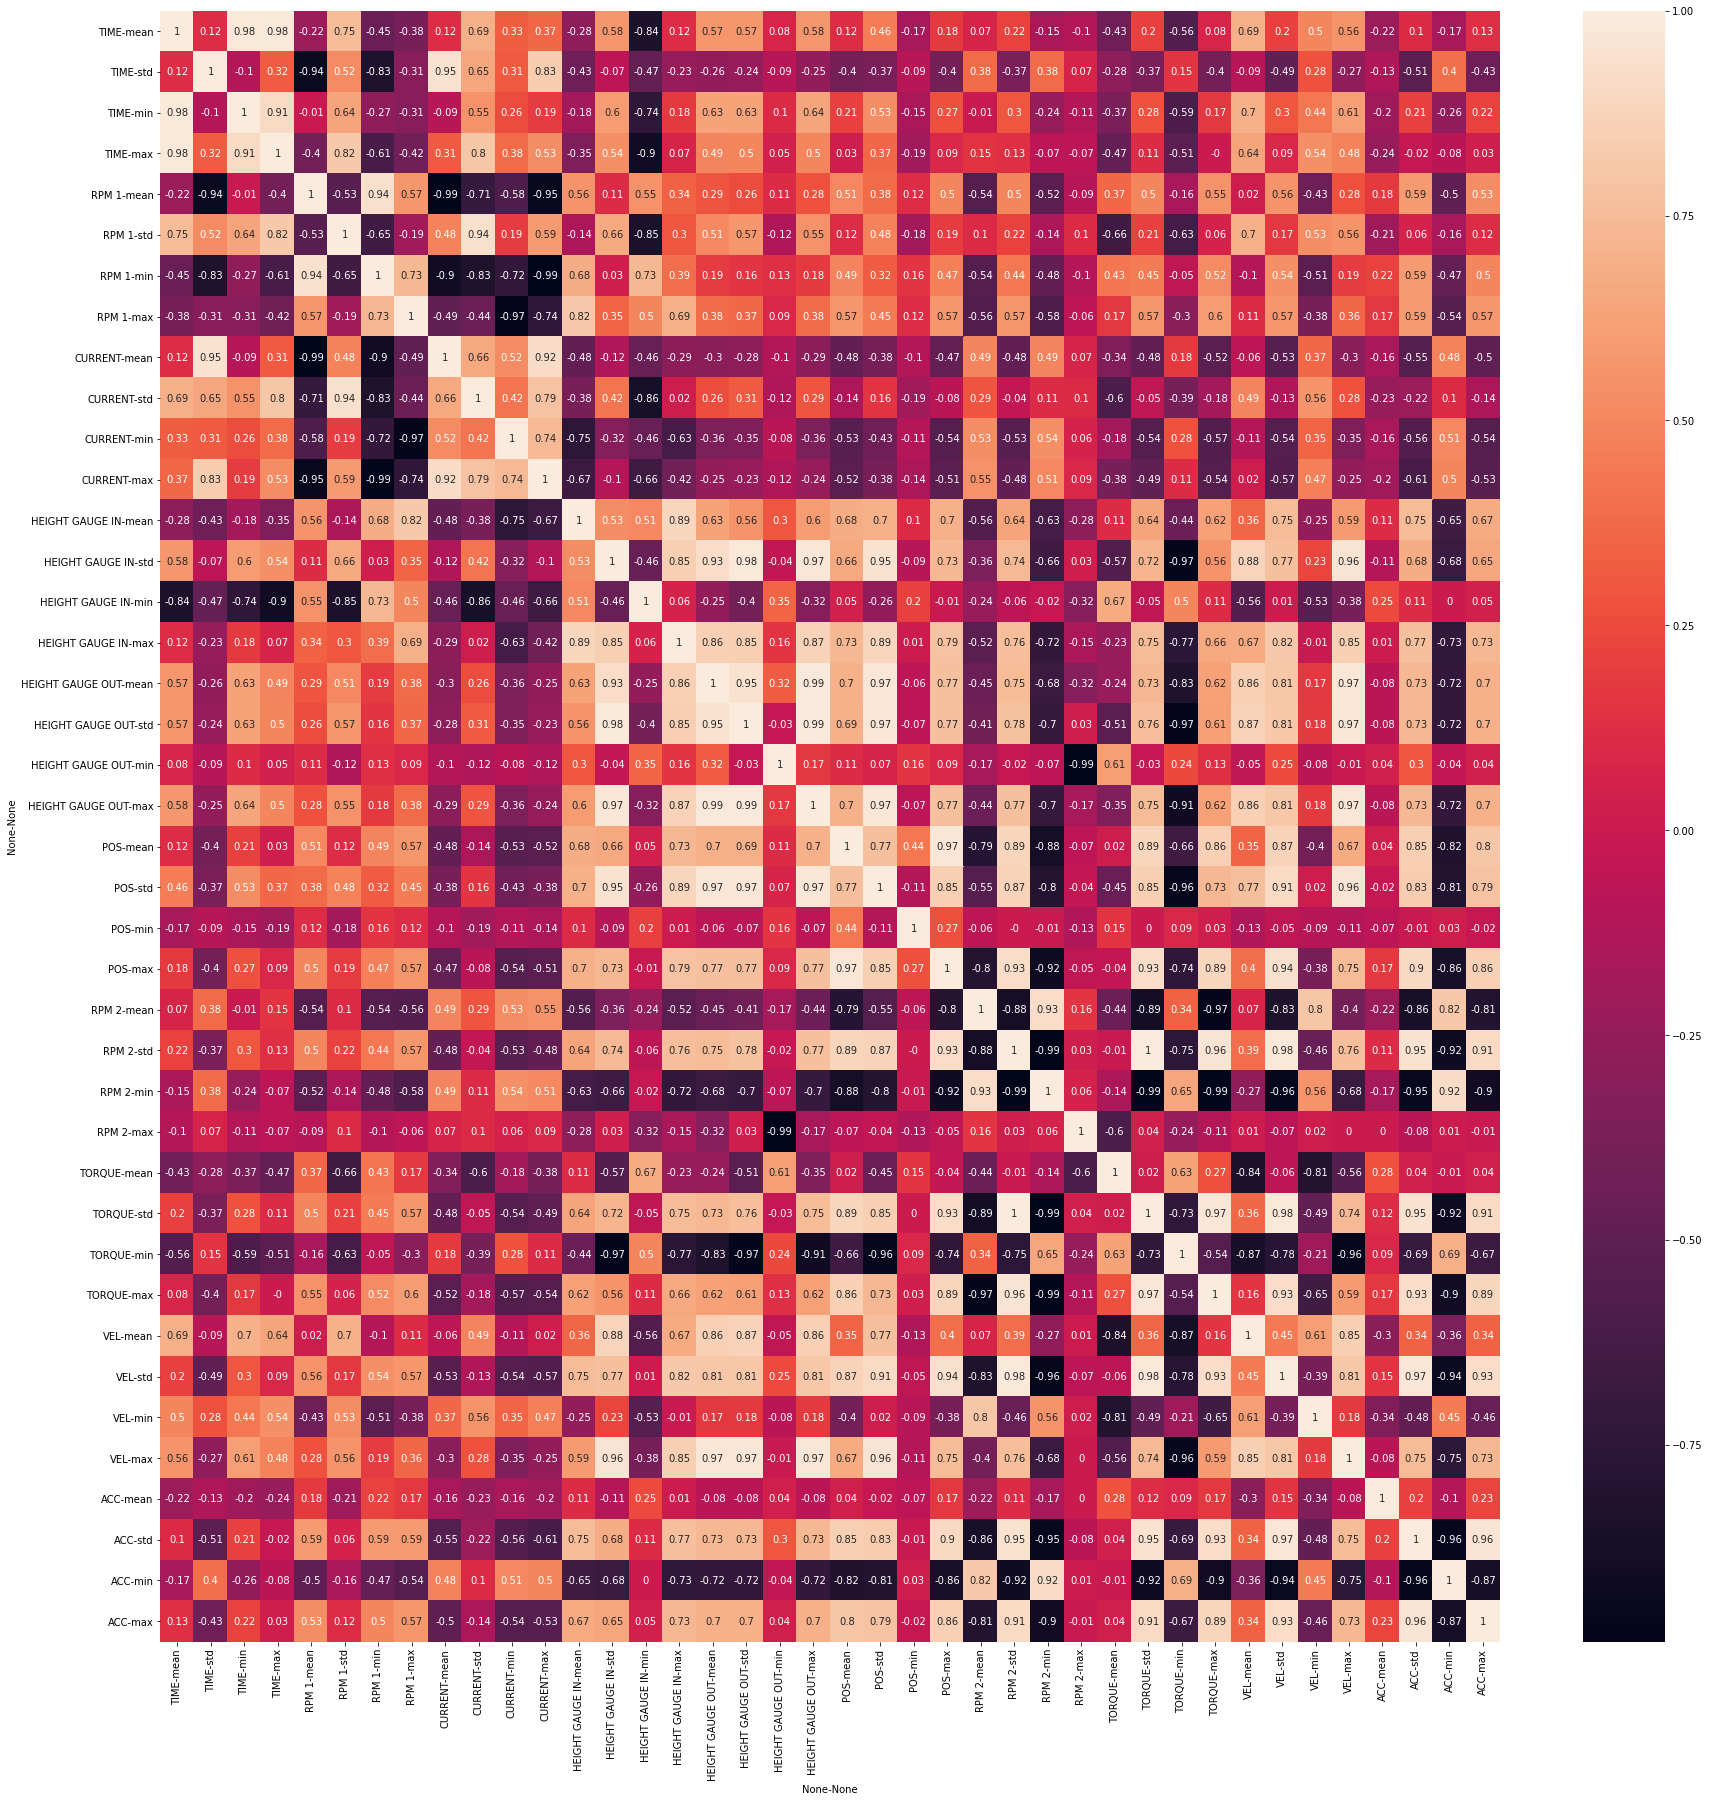

[[458  11]
 [ 18 423]]
              precision    recall  f1-score   support

         Bad       0.96      0.98      0.97       469
        Good       0.97      0.96      0.97       441

    accuracy                           0.97       910
   macro avg       0.97      0.97      0.97       910
weighted avg       0.97      0.97      0.97       910

There are about 15 bad wafers all consecutively bad!
	Preventative Mainten
      Count
Type       
Bad      15
Good     11


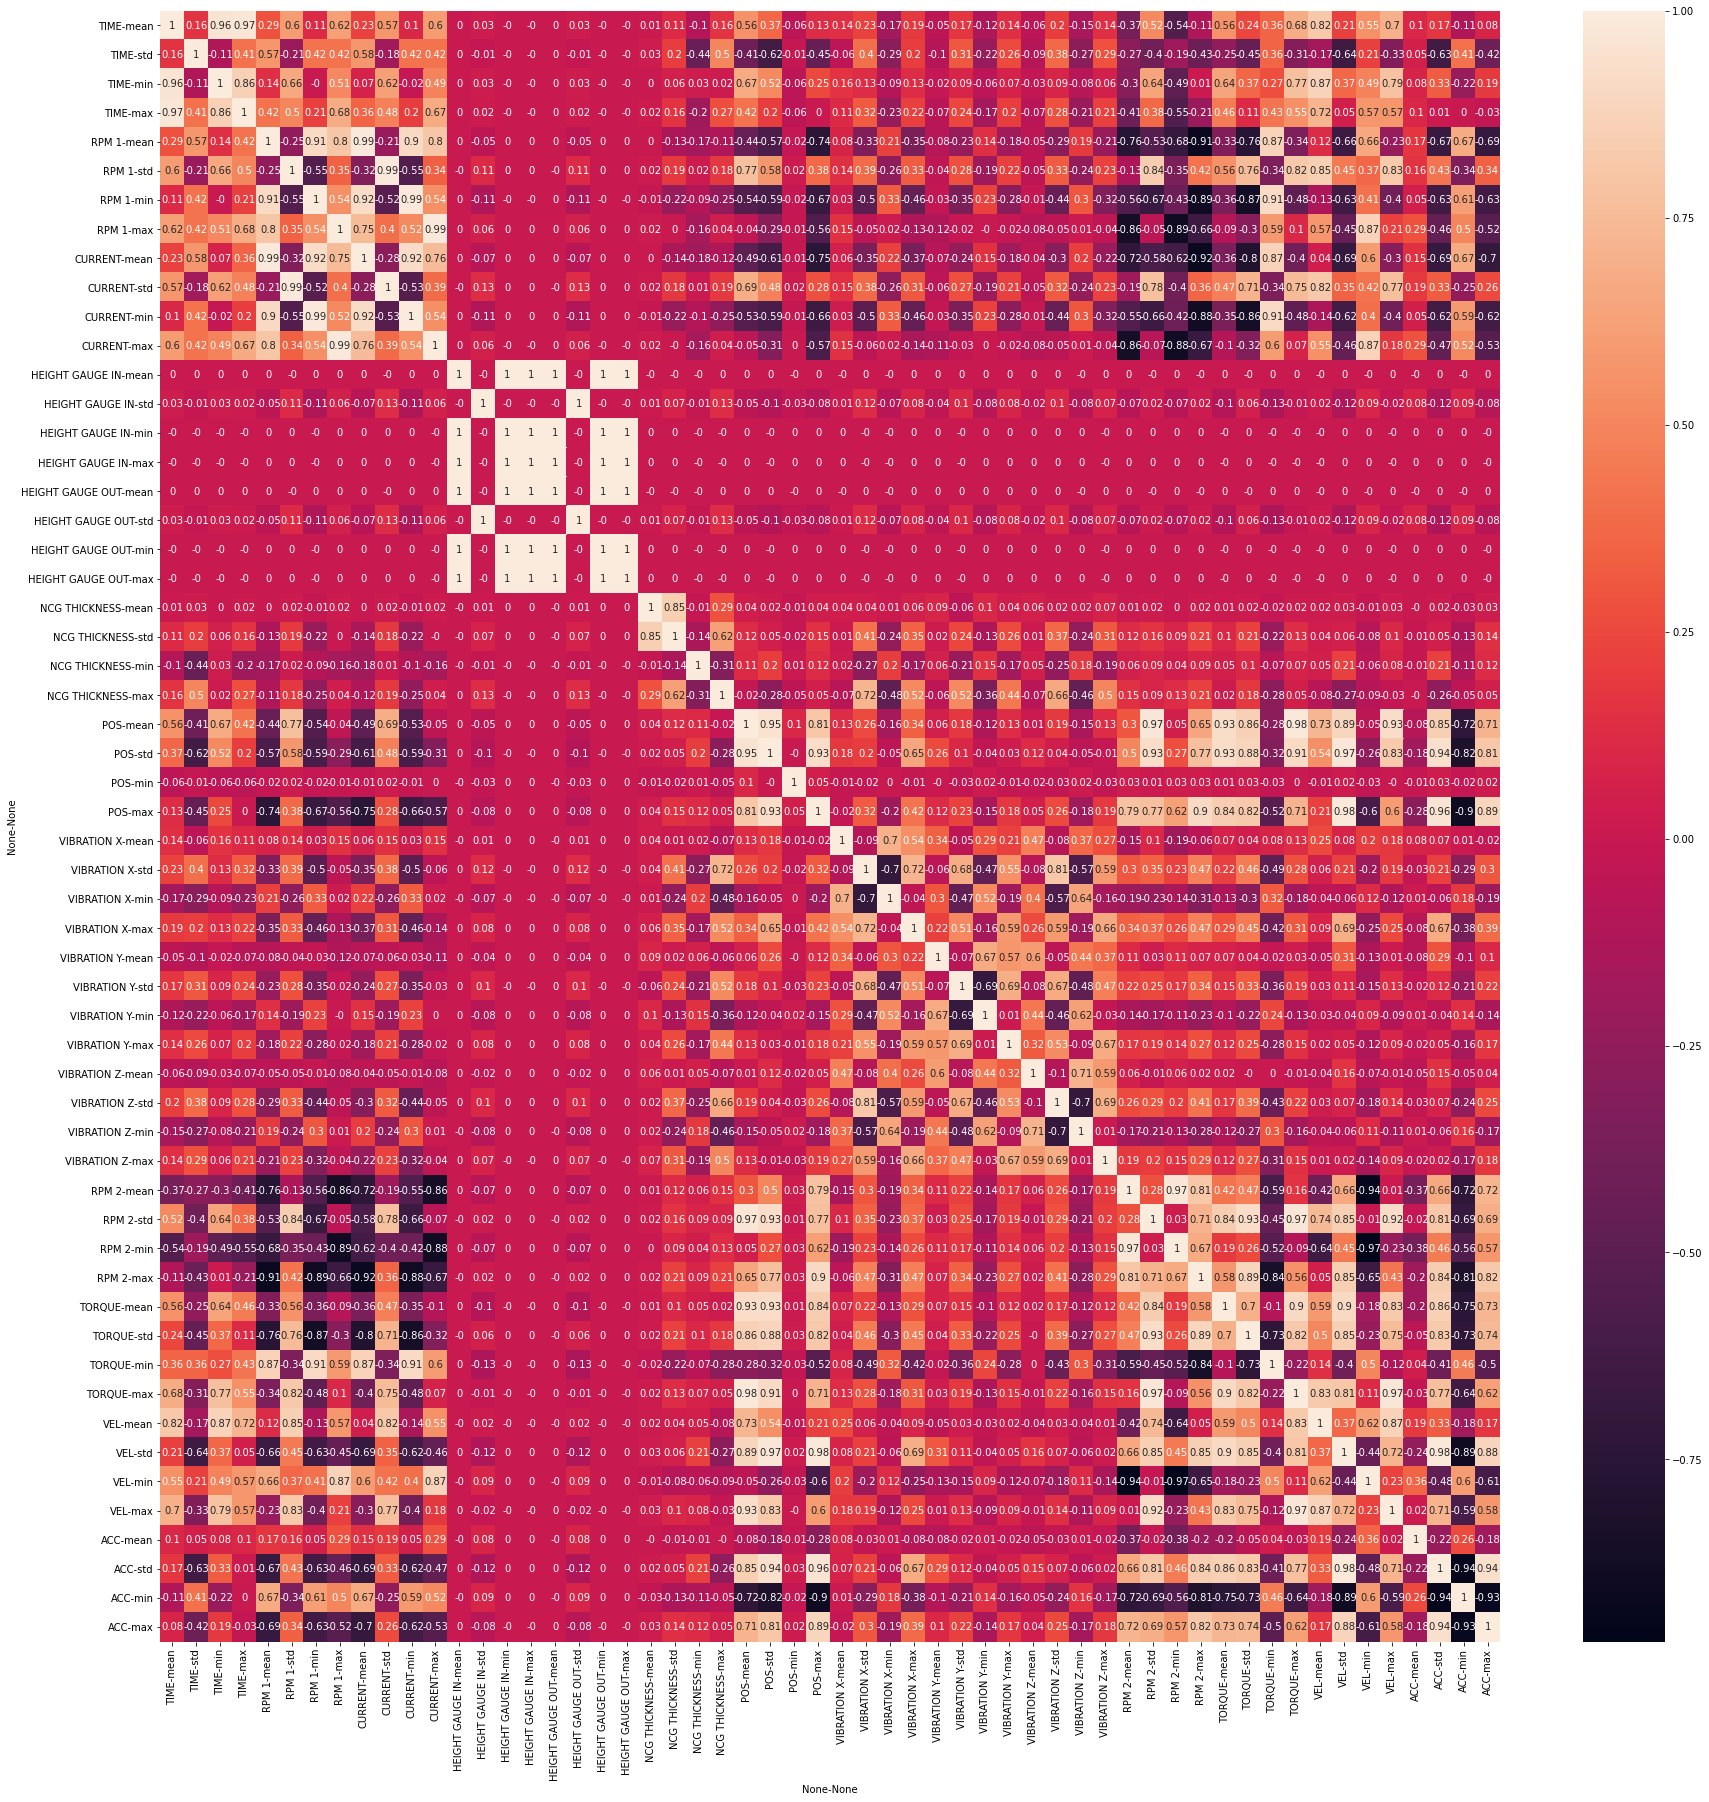

[[294  30]
 [ 23 331]]
              precision    recall  f1-score   support

         Bad       0.93      0.91      0.92       324
        Good       0.92      0.94      0.93       354

    accuracy                           0.92       678
   macro avg       0.92      0.92      0.92       678
weighted avg       0.92      0.92      0.92       678

The threshold of  10  consecutively bad wafers were not found.
      Count
Type       
Bad       8
Good     15


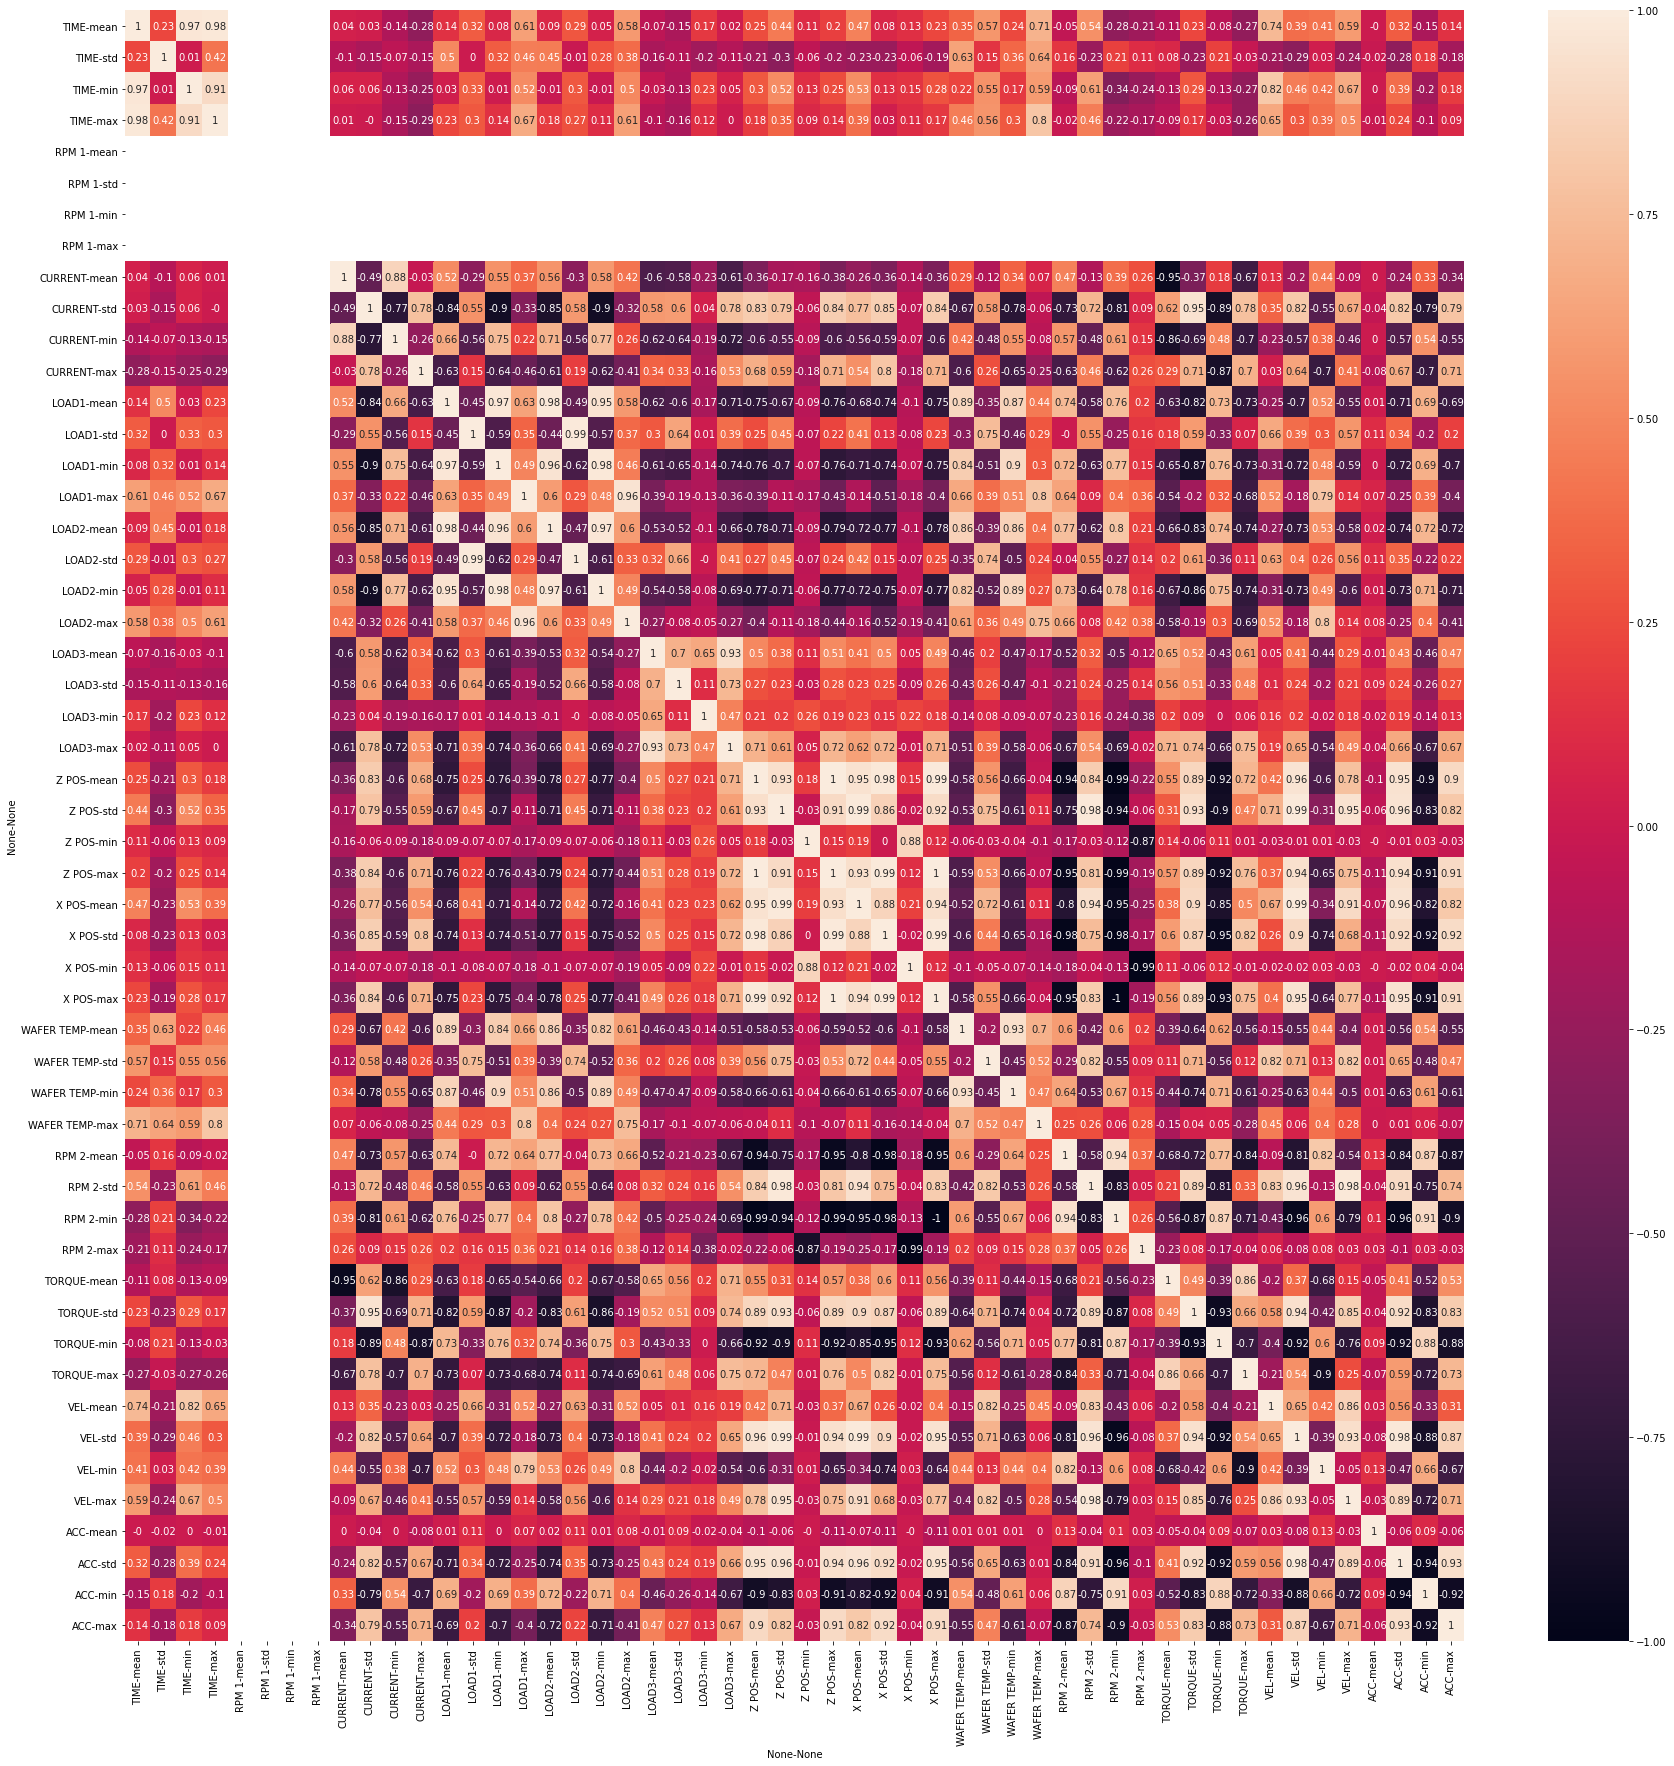

[[513  19]
 [ 22 488]]
              precision    recall  f1-score   support

         Bad       0.96      0.96      0.96       532
        Good       0.96      0.96      0.96       510

    accuracy                           0.96      1042
   macro avg       0.96      0.96      0.96      1042
weighted avg       0.96      0.96      0.96      1042

The threshold of  10  consecutively bad wafers were not found.
      Count
Type       
Bad       7
Good      8


In [43]:
threshold = int(input("Enter the threshold: "))
run_z1(threshold)
run_z2(threshold)
run_z3(threshold)